<a href="https://colab.research.google.com/github/Monisha-11/nn-classification/blob/main/DLEXP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv("customers.csv")
df.columns
df.dtypes
df.shape
df.isnull().sum()

df = df.drop('ID',axis=1)
df = df.drop('Var_1',axis=1)

df_cleaned = df.dropna(axis=0)

df_cleaned.isnull().sum()
df_cleaned.shape
df_cleaned.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

In [ ]:
df_cleaned['Gender'].unique()
df_cleaned['Ever_Married'].unique()
df_cleaned['Graduated'].unique()
df_cleaned['Profession'].unique()
df_cleaned['Spending_Score'].unique()
df_cleaned['Segmentation'].unique()


categories_list=[['Male', 'Female'],['No', 'Yes'],
                 ['No', 'Yes'],['Healthcare', 'Engineer',
                 'Lawyer','Artist', 'Doctor','Homemaker',
                 'Entertainment', 'Marketing', 'Executive'],
                 ['Low', 'Average', 'High']]
enc = OrdinalEncoder(categories=categories_list)

df1 = df_cleaned.copy()

df1[['Gender','Ever_Married',
     'Graduated','Profession',
     'Spending_Score']] = enc.fit_transform(df1[['Gender',
     						'Ever_Married','Graduated',
                            'Profession','Spending_Score']])
df1
df1.dtypes

le = LabelEncoder()
df1['Segmentation'] = le.fit_transform(df1['Segmentation'])

df1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

<ipython-input-99-bd33dfbd3ef7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])


<Axes: xlabel='Family_Size', ylabel='Age'>

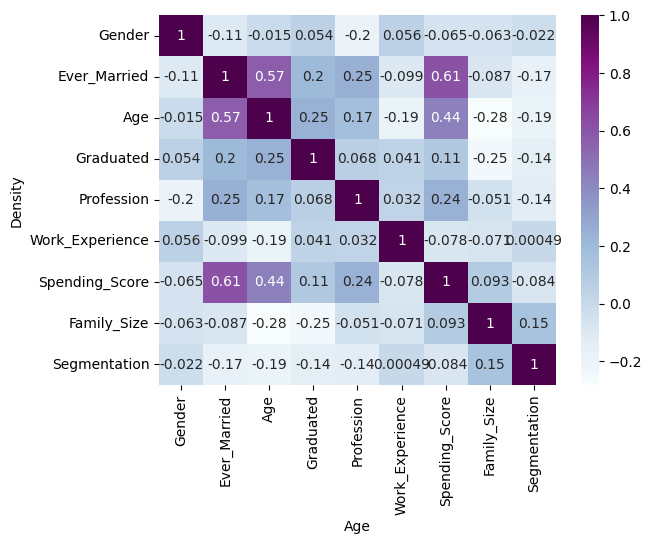

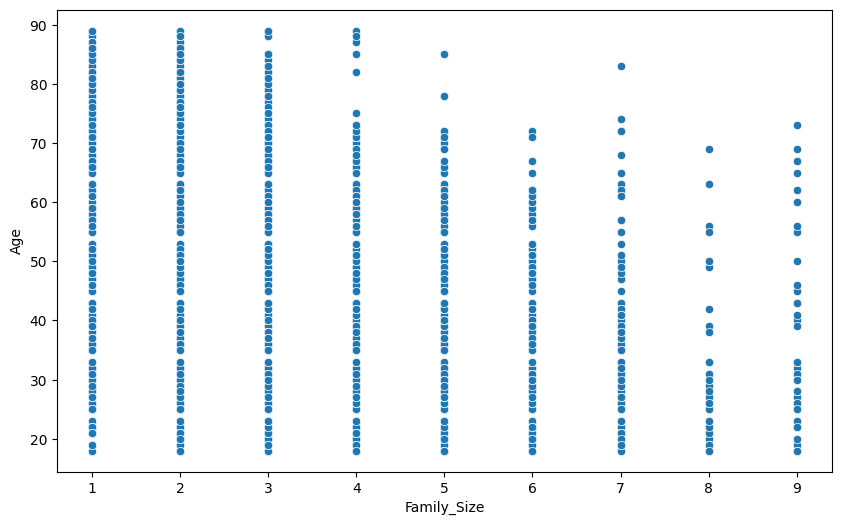

In [ ]:
corr = df1.corr()

sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="BuPu",
            annot= True)

sns.distplot(df1['Age'])

plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Age',data=df1)

In [ ]:
scale = MinMaxScaler()
scale.fit(df1[["Age"]]) # Fetching Age column alone
df1[["Age"]] = scale.transform(df1[["Age"]])

df1.describe()

df1['Segmentation'].unique()

x = df1[['Gender','Ever_Married','Age','Graduated',
		 'Profession','Work_Experience','Spending_Score',
         'Family_Size']].values

y1 = df1[['Segmentation']].values

ohe = OneHotEncoder()
ohe.fit(y1)

y = ohe.transform(y1).toarray()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=50)


In [ ]:
ai = Sequential([Dense(30,input_shape = [8]),
                 Dense(20,activation="relu"),
                 Dense(30,activation="relu"),
                 Dense(20,activation="relu"),
                 Dense(30,activation="relu"),
                 Dense(4,activation="softmax")])

In [ ]:
ai.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='max',
    verbose=1,
    patience=20)


In [ ]:
ai.fit( x = x_train, y = y_train,
        epochs=500, batch_size=256,
        validation_data=(x_test,y_test),
        callbacks = [early_stop]
        )

Epoch 1/500
24/24 [==============================] - 2s 15ms/step - loss: 1.4157 - accuracy: 0.2750 - val_loss: 1.3646 - val_accuracy: 0.3661
Epoch 2/500
24/24 [==============================] - 0s 5ms/step - loss: 1.3511 - accuracy: 0.3698 - val_loss: 1.3320 - val_accuracy: 0.3941
Epoch 3/500
24/24 [==============================] - 0s 7ms/step - loss: 1.3214 - accuracy: 0.3813 - val_loss: 1.2935 - val_accuracy: 0.4228
Epoch 4/500
24/24 [==============================] - 0s 6ms/step - loss: 1.2916 - accuracy: 0.3993 - val_loss: 1.2622 - val_accuracy: 0.4309
Epoch 5/500
24/24 [==============================] - 0s 5ms/step - loss: 1.2690 - accuracy: 0.4248 - val_loss: 1.2447 - val_accuracy: 0.4444
Epoch 6/500
24/24 [==============================] - 0s 5ms/step - loss: 1.2549 - accuracy: 0.4253 - val_loss: 1.2370 - val_accuracy: 0.4508
Epoch 7/500
24/24 [==============================] - 0s 5ms/step - loss: 1.2462 - accuracy: 0.4430 - val_loss: 1.2353 - val_accuracy: 0.4464
Epoch 8/500


93/93 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.38      0.51      0.43       779
           1       0.33      0.19      0.24       669
           2       0.52      0.51      0.51       731
           3       0.59      0.61      0.60       787

    accuracy                           0.46      2966
   macro avg       0.45      0.45      0.45      2966
weighted avg       0.46      0.46      0.45      2966



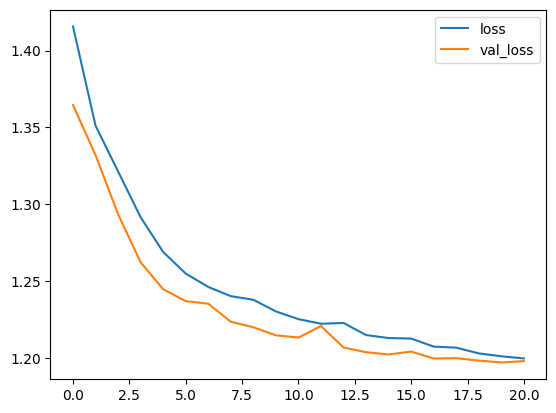

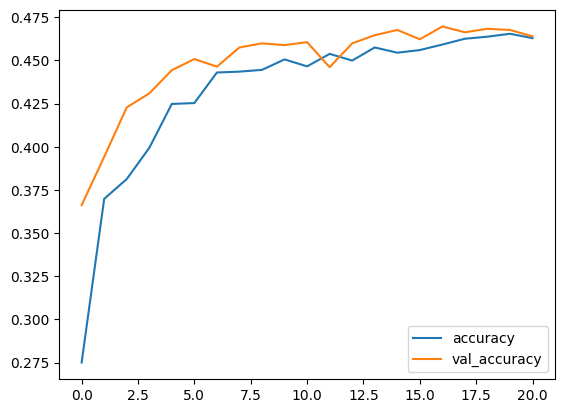

In [ ]:
metrics = pd.DataFrame(ai.history.history)
metrics.head()

metrics[['loss','val_loss']].plot()

metrics[['accuracy','val_accuracy']].plot()

x_pred = np.argmax(ai.predict(x_test), axis=1)
x_pred.shape

y_truevalue = np.argmax(y_test,axis=1)
y_truevalue.shape


print(report(y_truevalue,x_pred))

In [ ]:
conf(y_truevalue,x_pred)

array([[395, 106, 112, 166],
       [266, 126, 193,  84],
       [164, 112, 374,  81],
       [222,  38,  46, 481]])

In [ ]:
import pickle

# Saving the Model
ai.save('customer_classification_model.h5')

# Saving the data
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([x_train,y_train,x_test,y_test,df1,df_cleaned,scale,enc,ohe,le], fh)

# Loading the Model
ai_brain = load_model('customer_classification_model.h5')

# Loading the data
with open('customer_data.pickle', 'rb') as fh:
   [x_train,y_train,x_test,y_test,df1,df_cleaned,scale,enc,ohe,le]=pickle.load(fh)

In [ ]:
x_prediction = np.argmax(ai_brain.predict(x_test[1:2,:]), axis=1)

print(x_prediction)

print(le.inverse_transform(x_prediction))

1/1 [==============================] - 0s 154ms/step
[0]
['A']
